# Bushfire Analysis using Meteorological Data

#### Name: Mohammad Zaki Gundagi


## INTRODUCTION

Our task is to predict the burned area of bushfire by using meteorological data that are known to infuence the wild fires. The dataset that we are going to use here were originally collected from the northeast region of Portugal between January 2000 and December 2003. 

## DATA EXPLORATION

In [1]:
# Importing libraries
library(ISLR)
library(psych)
library(ggplot2)
library(reshape2)
library(GGally)
library(lattice)
library(gridExtra)
library(leaps)
library(packHV)
library(corrplot)
library(RColorBrewer)
library(packHV)
library(caTools)
library(glmnet)
library(scales)
library(stats)
library(car)
library(grid)
library(caret)

Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'packHV' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required pack

Let us read the csv file into a dataframe.

In [2]:
df <- read.csv('forestfires.csv',header = TRUE, sep = ',')

Using the .names file available to us, we can understand what all the attributes are for.
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

We know that 'area' is our target variable.

Now let us use some descriptive statistics to find some information about our data.

In [3]:
# Display the dimensions
cat("The bushfire dataset has", dim(df)[1], "records, each with", dim(df)[2],
    "attributes. The structure is:\n\n")

# Display the structure
str(df)

cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(df)

cat("The numbers of unique values for each attribute are:")
apply(df, 2, function(x) length(unique(x)))

The bushfire dataset has 517 records, each with 13 attributes. The structure is:

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...

Basic statistics for each attribute are:

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

The numbers of unique values for each attribute are:

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    9     7    12     7   106   215   219   119   192    75    21     7   251

In [4]:
round(describe(df),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255
RH,10,517,44.288,16.317,42.00,42.706,14.826,15.0,100.00,85.00,0.858,0.409,0.718


Some observations for our data:
- Since n = 517 for all the columns, there aren't any missing values in our data.
- The variable 'area' has a huge range(1090.84). It is also highly skewed(12.722).
- The variable 'rain' is also highly skewed(19.7020).
- The mean and median of most variables are close to each other. The exception is 'area' variable.
- For variables 'FFMC', 'ISI', 'rain' and 'area', the kurtosis is very high which shows that they have large value outliers present.



### BOXPLOTS AND HISTOGRAMS

As all our variables aren't numeric, we'll create a new dataframe with just numeric/integer datatypes to create our boxplots and histograms. Boxplots help us identify the outliers(if any) and histograms highlight the trend and distribution of the variables.

In [5]:
numeric_df<-df[,-c(1:4)]

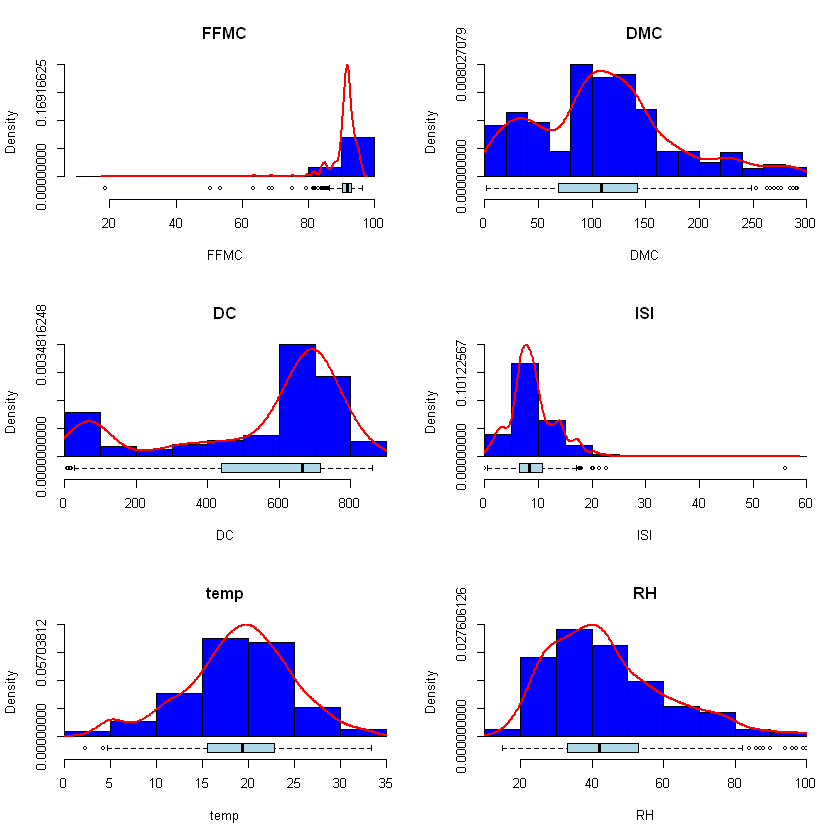

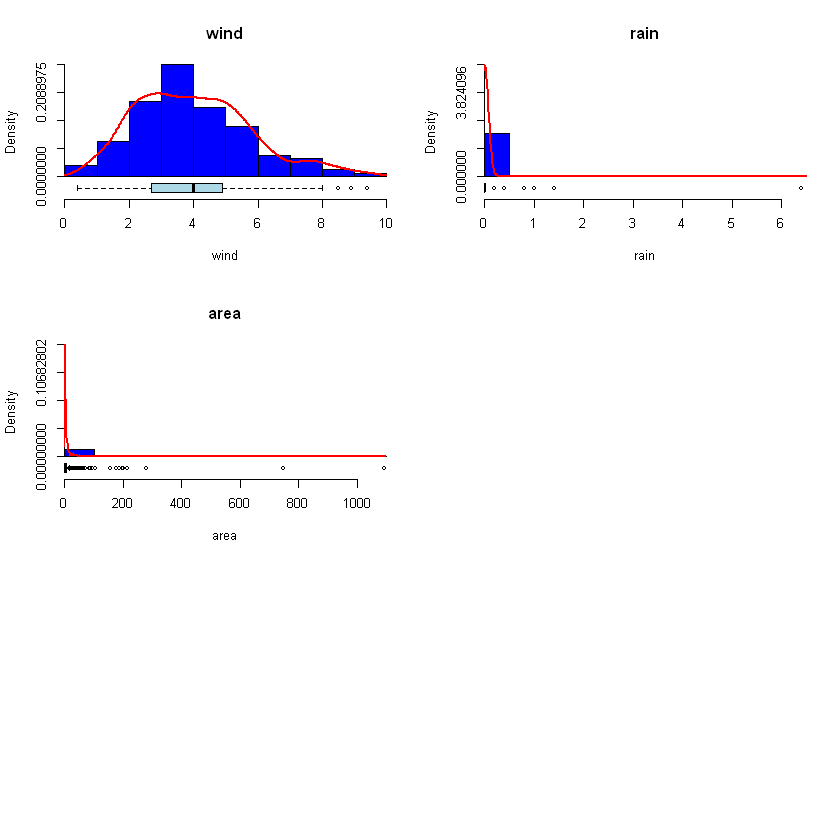

In [6]:
# box plot and histogram
#install.packages("packHV")

par(mfrow=c(3,2))
column_names=colnames(numeric_df)
for (i in colnames(numeric_df)){
    hist_boxplot(numeric_df
                 [,i],col="blue",freq=FALSE, density=TRUE
                 , xlab = i,main = names(df[i]))
}

Our observations from these histograms and boxplots are:

- The variables 'temp' and 'wind' have close to a normal distribution.
- Variables 'area' and 'rain' have huge outliers.


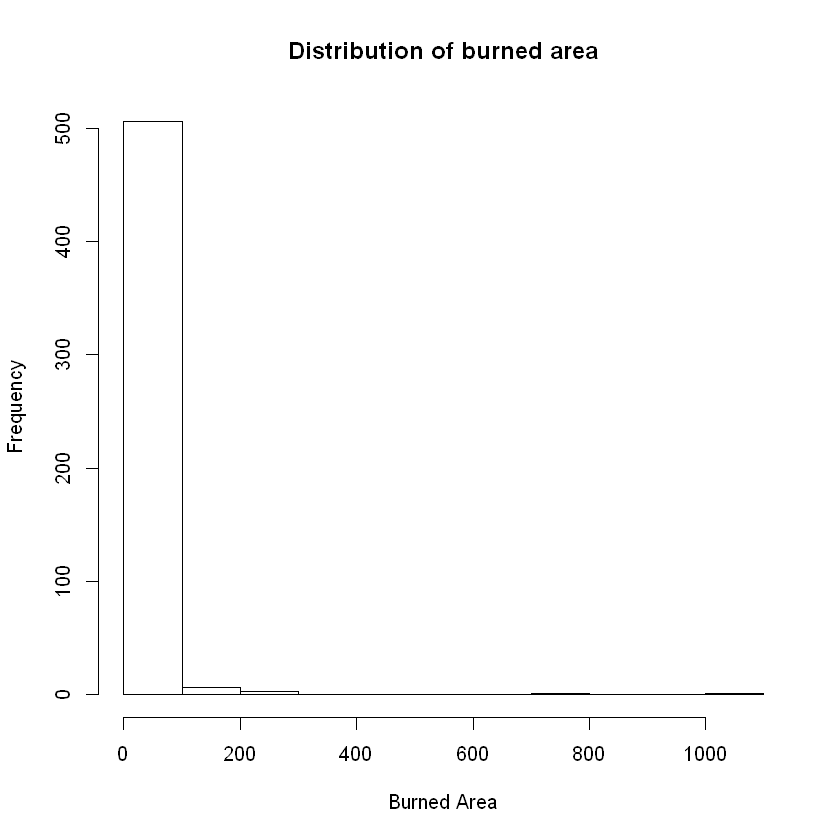

In [7]:
hist(df$area, main ="Distribution of burned area", xlab = "Burned Area")

The histogram for our target variable shows that the distribution is heavily skewed.

### Normalization of 'area' variable

As the area variable is heavily skewed, we shall normalize it to find a better match.

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 247 rows containing non-finite values (stat_bin)."

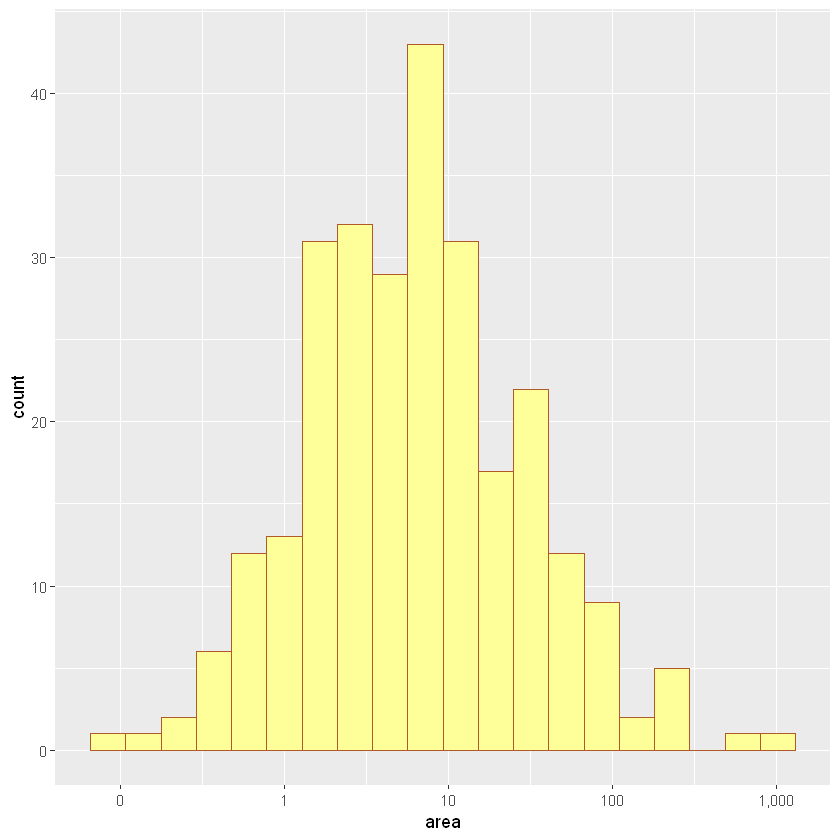

In [8]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p1 <- ggplot(aes(x=area), data=df) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels = comma)
p1

The above graph shows the new variable 'log_area' as a normal distribution. This will help us build better models.


### COORELATION

In [9]:
cor(numeric_df[c(1:9)])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.00000000,0.38261880,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,0.38261880,1.00000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,0.33051180,0.68219161,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.53180493,0.30512783,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,0.43153226,0.46959384,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,-0.30099542,0.07379494,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,-0.02848481,-0.10534225,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.05670153,0.07478998,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729
area,0.04012200,0.07299430,0.04938323,0.008257688,0.09784411,-0.07551856,0.01231728,-0.007365729,1.000000000


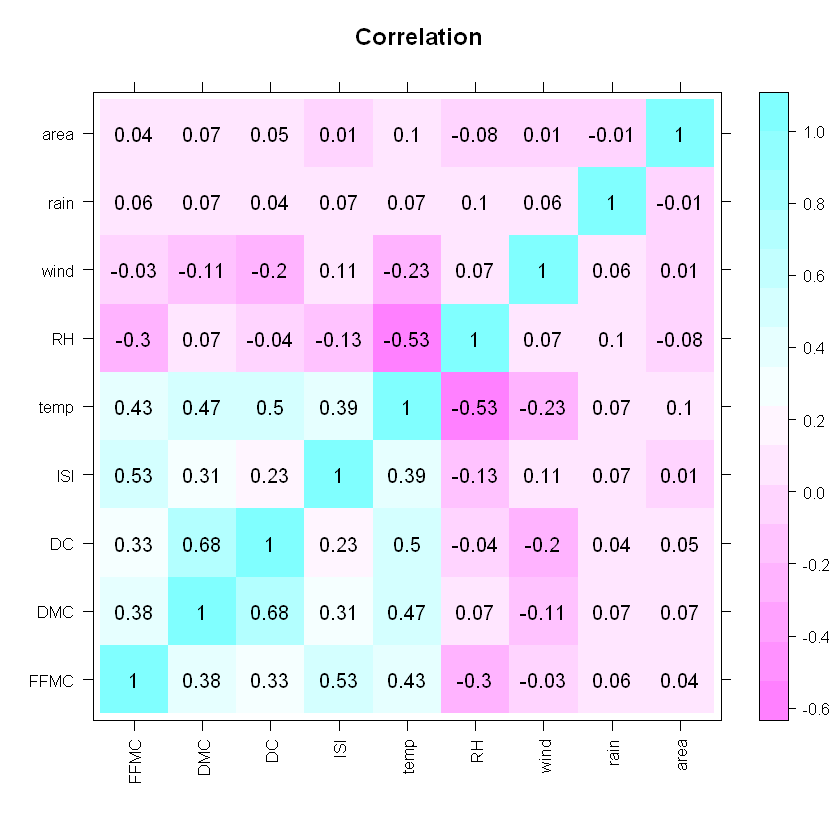

In [10]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}

#Plot the correlation matrix.
levelplot(cor(numeric_df), main = "Correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

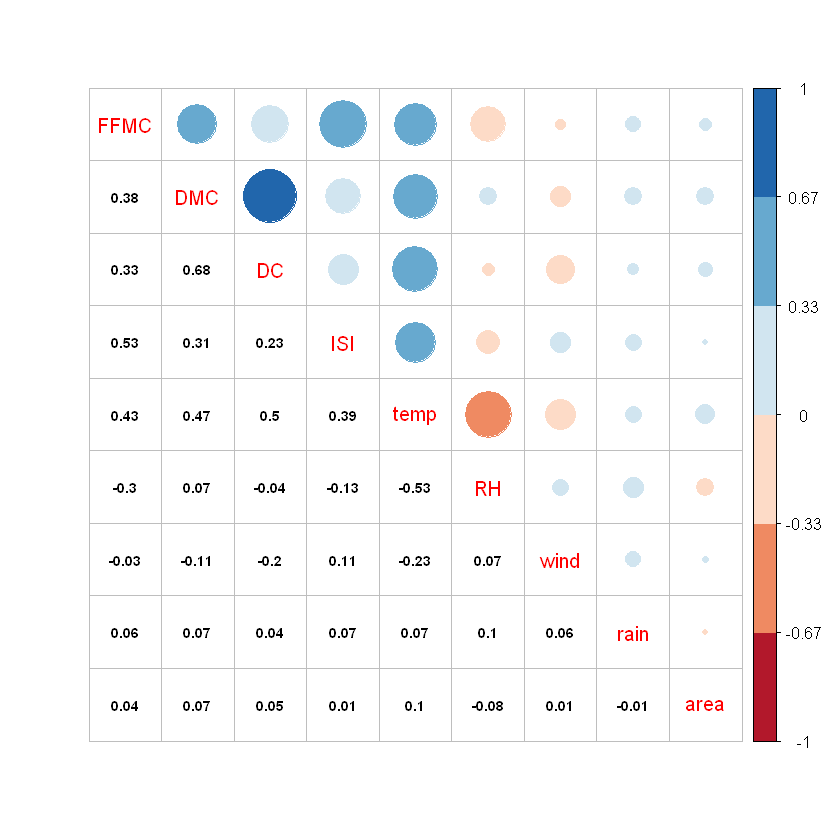

In [11]:

M <- cor(numeric_df)
corrplot.mixed(M,lower.col = "black",upper.col =  brewer.pal(n = 6, name = "RdBu"), number.cex = .7)
#corrplot(M, type = "lower",  col = brewer.pal(n = 8, name = "PuOr"))
#corrplot(M, order = "FPC",type = "lower")


Our obserations from Correlation are:

- The variable 'area' has a positive correlation with 'temp' and negative correlation with 'RH'.
- The variable 'temp' has positive correlation with 'FFMC', 'DMC', 'DC' and 'ISI'. It has negative correlation with 'RH' and 'wind'.
- The variable 'rain' has positive correlation with all variables but important to note is the one with 'RH'.
- The variable 'wind' has negative correlation with 'temp' and 'DC'.

We can see that the variables 'FFMC', 'DMC', 'DC' and 'ISI' are all closely correlated to 'temp'.

For our factor variables(month and day)

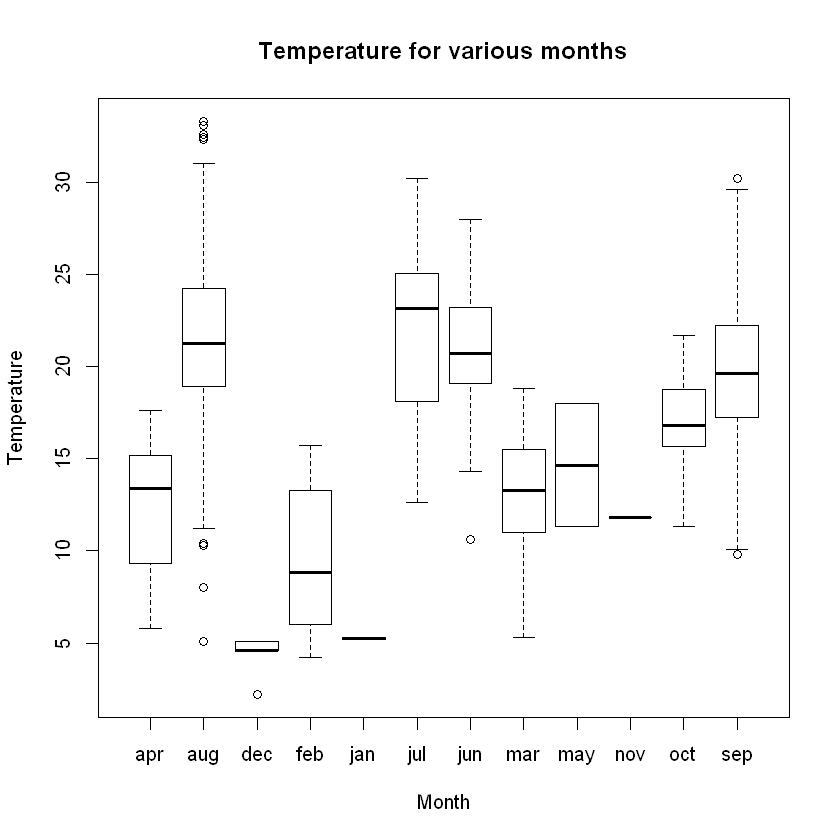

In [12]:
plot(df$month, df$temp, xlab = "Month", ylab = "Temperature",main = "Temperature for various months")

#ggplot(df, aes(df$month, df$temp)) + geom_line() 


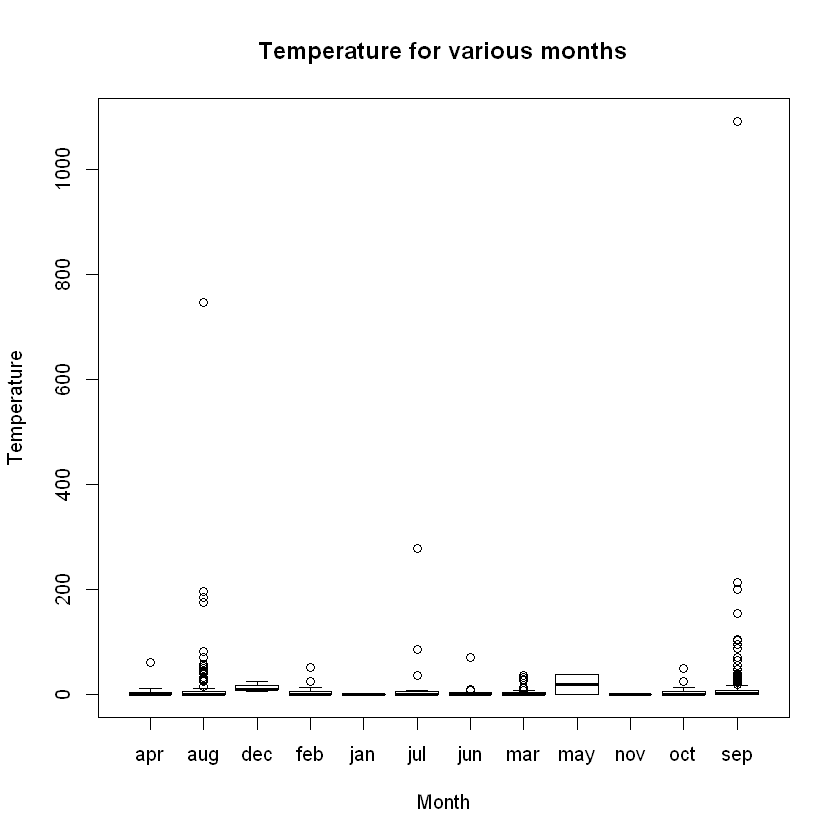

In [13]:
plot(df$month, df$area, xlab = "Month", ylab = "Temperature",main = "Temperature for various months")

#ggplot(df, aes(df$month, df$temp)) + geom_line() 


We can see that the 'months' determine how temp is affected.And we know that 'temp' affects the 'area' variable.

## Model development

## Feature selection

As our features have so many varied values we must perform feature scaling to help us find better solutions. We perform min max normalisation. We will also perform dummy coding for our factor variables.

In [14]:
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
  }

In [15]:
df1 <- dummyVars(~month+day, data=df)
dummy_df <- data.frame(predict(df1, newdata = df))

In [16]:
dfNorm <- as.data.frame(lapply(df[5:13], normalize))
df <- df[, -c(5:13)]
df <-cbind(df, dfNorm)
df<-cbind(df,dummy_df)
df <- df[,-c(3:4)] 
summary(df)

       X               Y            FFMC             DMC        
 Min.   :1.000   Min.   :2.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:3.000   1st Qu.:4.0   1st Qu.:0.9226   1st Qu.:0.2326  
 Median :4.000   Median :4.0   Median :0.9406   Median :0.3694  
 Mean   :4.669   Mean   :4.3   Mean   :0.9283   Mean   :0.3783  
 3rd Qu.:7.000   3rd Qu.:5.0   3rd Qu.:0.9574   3rd Qu.:0.4869  
 Max.   :9.000   Max.   :9.0   Max.   :1.0000   Max.   :1.0000  
       DC              ISI              temp              RH        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5040   1st Qu.:0.1159   1st Qu.:0.4277   1st Qu.:0.2118  
 Median :0.7697   Median :0.1497   Median :0.5498   Median :0.3176  
 Mean   :0.6333   Mean   :0.1608   Mean   :0.5366   Mean   :0.3446  
 3rd Qu.:0.8280   3rd Qu.:0.1925   3rd Qu.:0.6624   3rd Qu.:0.4471  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      wind             rain               area             mon

Let us divide our dataset into training and test data.

In [17]:
set.seed(312)
split = sample.split(df$area, SplitRatio = 0.8)
training = subset(df, split == TRUE)
test = subset(df, split == FALSE)

In [18]:
dim(training)

[1] 467  30

In [19]:
dim(test)

[1] 50 30

### Lasso Shrinkage method

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of 
coefficients. This type of regularization can result in sparse models with few coefficients;
Some coefficients can become zero and eliminated from the model.

In [20]:
x=model.matrix(area~.-1,data =df) #Matrix of independent variables
y=df$area #Response vector for the dependent variable

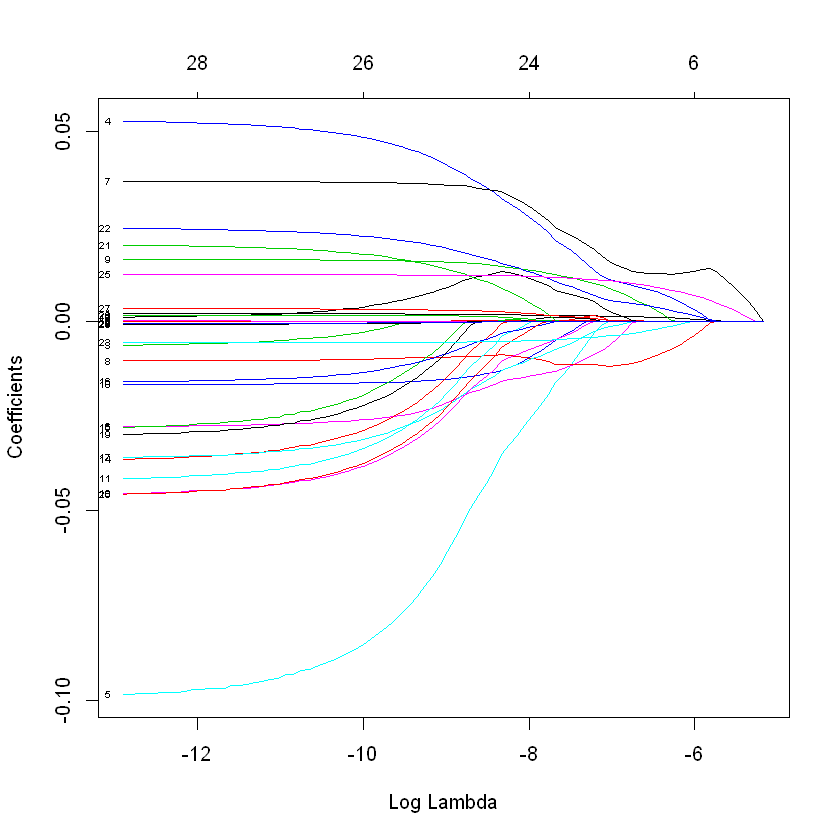

In [21]:
fit.lasso=glmnet(x,y)
plot(fit.lasso,xvar='lambda',label=TRUE)


As we can see above, the co-effecients start at zero and then move towards a non-zero value. This is how lasso does
feature selection.

Now, we will perform cross validation using the cv.glmnet function.

In [22]:
cv.lasso=cv.glmnet(x,y)

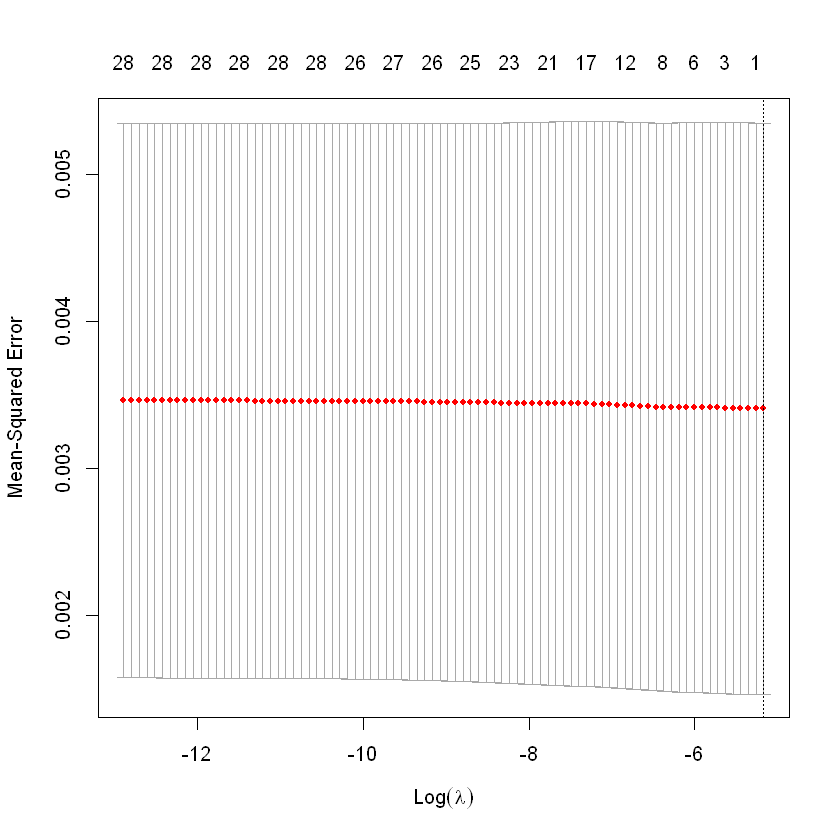

In [23]:
plot(cv.lasso)

The above figure is not helping us find any variable which will help us make a better model. It is showing us a value of 1 which will be too little.

In [24]:
coef(cv.lasso)

30 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 0.01177743
X           .         
Y           .         
FFMC        .         
DMC         .         
DC          .         
ISI         .         
temp        .         
RH          .         
wind        .         
rain        .         
month.apr   .         
month.aug   .         
month.dec   .         
month.feb   .         
month.jan   .         
month.jul   .         
month.jun   .         
month.mar   .         
month.may   .         
month.nov   .         
month.oct   .         
month.sep   .         
day.fri     .         
day.mon     .         
day.sat     .         
day.sun     .         
day.thu     .         
day.tue     .         
day.wed     .         

Even the coeff function is showing only the intercept having any meaningful value.

Let us find the lambda for the lasso.

In [25]:
set.seed(11)
train = sample(seq(517),280,replace=FALSE)
lasso.tr = glmnet(x[train,],y[train])
lasso.tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df     %Dev    Lambda
1   0 0.000000 2.988e-03
2   1 0.002260 2.723e-03
3   1 0.004135 2.481e-03
4   3 0.007766 2.260e-03
5   3 0.011730 2.060e-03
6   5 0.015720 1.877e-03
7   5 0.020080 1.710e-03
8   6 0.024040 1.558e-03
9   6 0.027540 1.420e-03
10  8 0.031110 1.293e-03
11 10 0.034700 1.179e-03
12 10 0.038690 1.074e-03
13 10 0.041910 9.784e-04
14 11 0.044700 8.915e-04
15 12 0.047040 8.123e-04
16 12 0.049000 7.402e-04
17 13 0.051010 6.744e-04
18 13 0.052780 6.145e-04
19 14 0.054260 5.599e-04
20 14 0.055620 5.102e-04
21 17 0.057460 4.648e-04
22 18 0.060240 4.235e-04
23 20 0.062750 3.859e-04
24 20 0.064960 3.516e-04
25 20 0.066790 3.204e-04
26 20 0.068330 2.919e-04
27 20 0.069590 2.660e-04
28 20 0.070640 2.424e-04
29 20 0.072310 2.208e-04
30 21 0.073590 2.012e-04
31 23 0.075280 1.833e-04
32 23 0.076910 1.671e-04
33 24 0.078640 1.522e-04
34 25 0.080810 1.387e-04
35 24 0.082490 1.264e-04
36 25 0.084000 1.151e-04
37 25 0.085280 1.049e-04
38 

The above data gives you the following data:
- degree of freedom which is the number of non-zero coefficients 
- %dev which is like the R-squared for linear models 
- lambda value corresponding to each fit.

Let us try to make predictions on our validation set.

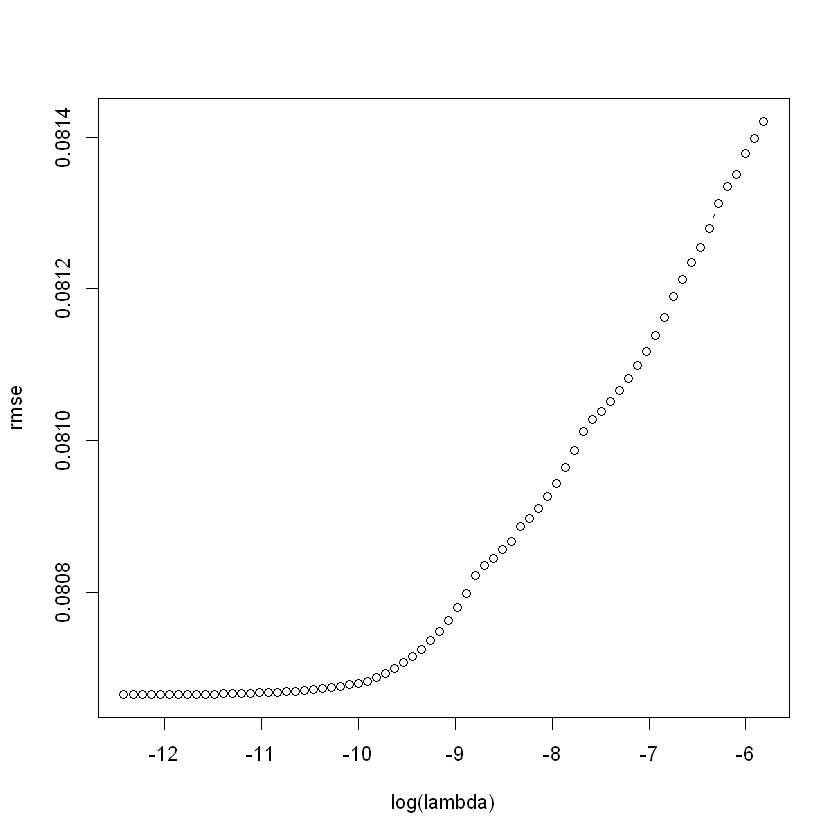

In [26]:
pred=predict(lasso.tr,x[-train,])
rmse = sqrt(apply((y[-train]-pred)^2,2,mean))
plot(log(lasso.tr$lambda),rmse,type='b',xlab='log(lambda)')

In [27]:
# Best lambda
lam.best = lasso.tr$lambda[order(rmse)[1]] 
lam.best #first entry

[1] 4.042922e-06

Let us look at the co-effecients corresponding to this value of lambda.

In [28]:
coef(lasso.tr,s=lam.best)

30 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  0.0398522958
X            0.0014519788
Y           -0.0001624823
FFMC         0.0024436321
DMC          0.0407776816
DC          -0.0791308322
ISI         -0.0264106814
temp        -0.0025223746
RH          -0.0148713974
wind         0.0024631355
rain        -0.0039908180
month.apr   -0.0288134110
month.aug    0.0122872077
month.dec   -0.0010356676
month.feb   -0.0270218376
month.jan   -0.0261736168
month.jul   -0.0033976206
month.jun   -0.0096534021
month.mar   -0.0328708420
month.may    .           
month.nov   -0.0380540596
month.oct    0.0178634256
month.sep    0.0262096680
day.fri     -0.0047200826
day.mon     -0.0061442112
day.sat      0.0039011771
day.sun      0.0014016627
day.thu     -0.0106150540
day.tue      .           
day.wed      0.0009452590

Let us create our subsets based on these variables.

In [29]:
lasso_df_train <- training[c('X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain',
                              'area','month.apr','month.aug','month.dec','month.feb',
                              'month.jan','month.jul','month.jun','month.mar',
                              'month.nov','month.oct','month.sep','day.fri','day.mon',
                              'day.sat','day.sun','day.thu','day.wed')]

lasso_df_test <- test[c('X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain',
                              'area','month.apr','month.aug','month.dec','month.feb',
                              'month.jan','month.jul','month.jun','month.mar',
                              'month.nov','month.oct','month.sep','day.fri','day.mon',
                              'day.sat','day.sun','day.thu','day.wed')]

#### Forward Stepwise Selection

For our feature selection, we will also use forward stepwise selection. it begins with an empty model and adds variables one by one.

regsubsets() function with the forward method is used to specify the forward selection.

In [30]:
regfit.forward = regsubsets(area~. , data=df, method = "forward", nvmax = 31)
regfit.forward.summary = summary(regfit.forward)
regfit.forward.summary

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"2  linear dependencies found"

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"

Subset selection object
Call: regsubsets.formula(area ~ ., data = df, method = "forward", nvmax = 31)
29 Variables  (and intercept)
          Forced in Forced out
X             FALSE      FALSE
Y             FALSE      FALSE
FFMC          FALSE      FALSE
DMC           FALSE      FALSE
DC            FALSE      FALSE
ISI           FALSE      FALSE
temp          FALSE      FALSE
RH            FALSE      FALSE
wind          FALSE      FALSE
rain          FALSE      FALSE
month.apr     FALSE      FALSE
month.aug     FALSE      FALSE
month.dec     FALSE      FALSE
month.feb     FALSE      FALSE
month.jan     FALSE      FALSE
month.jul     FALSE      FALSE
month.jun     FALSE      FALSE
month.mar     FALSE      FALSE
month.may     FALSE      FALSE
month.nov     FALSE      FALSE
month.oct     FALSE      FALSE
day.fri       FALSE      FALSE
day.mon       FALSE      FALSE
day.sat       FALSE      FALSE
day.sun       FALSE      FALSE
day.thu       FALSE      FALSE
day.tue       FALSE      FALSE


Now let us try to find the $C_{p}$, BIC and $R_{2}$ statistics for this forward method.

[1] "minimum number of variables are  3"


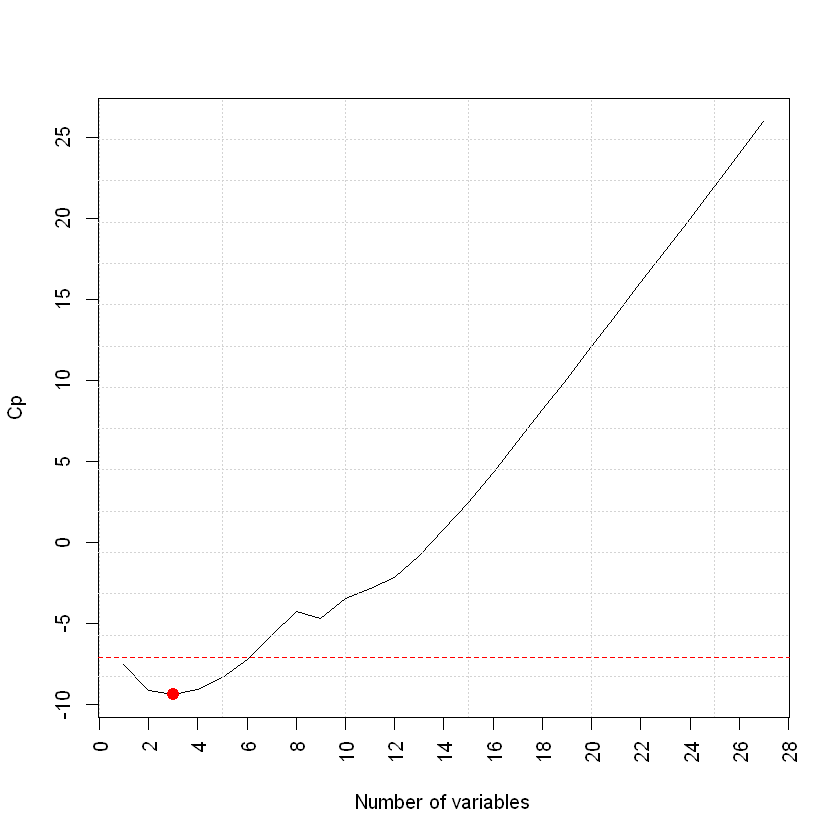

[1] "minimum number of variables are  1"


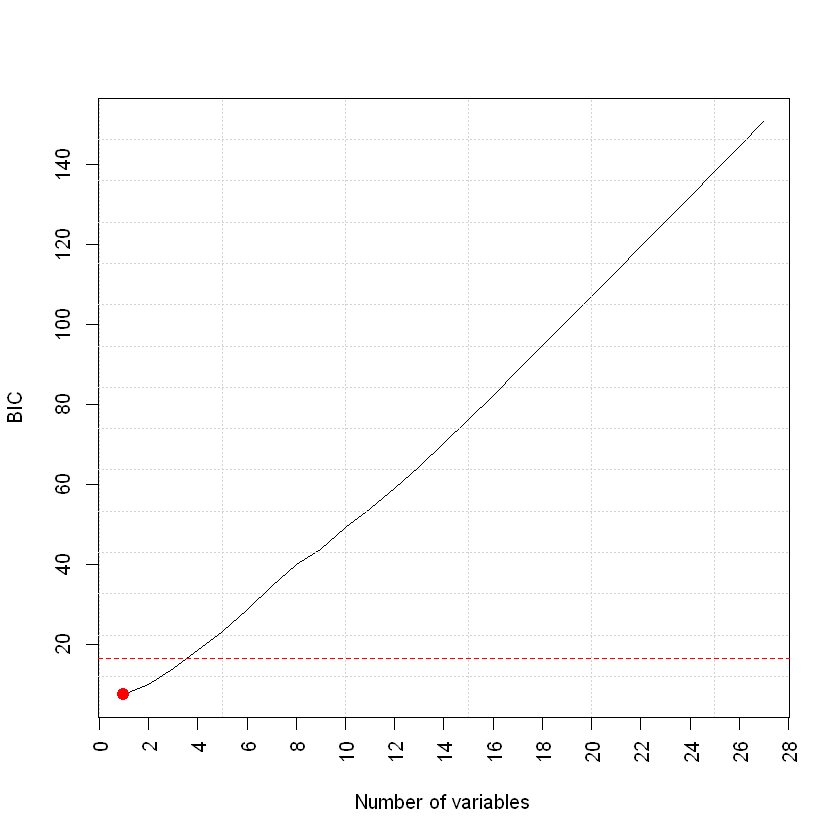

[1] "minimum number of variables are  12"


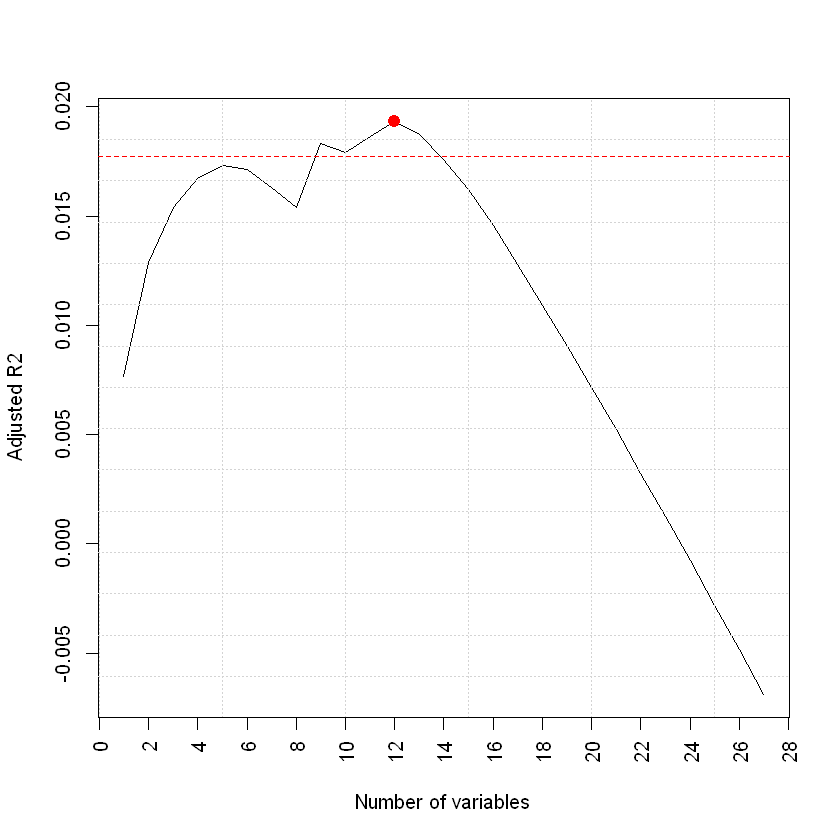

In [31]:
#Cp
plot(regfit.forward.summary$cp, xlab = "Number of variables", ylab = "Cp", type = "l",xaxt='n')
grid(, 15)
axis(1, at = seq(0, 30, by = 2), las=2)
min.cp <- min(regfit.forward.summary$cp)
std.cp <- sd(regfit.forward.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
min.cp <- which.min(regfit.forward.summary$cp)
print(paste("minimum number of variables are ",min.cp))
points(min.cp, regfit.forward.summary$cp[min.cp], col = "red", cex = 2, pch = 20)
#BIC
plot(regfit.forward.summary$bic, xlab = "Number of variables", ylab = "BIC", type='l',xaxt='n')
grid(, 15)
axis(1, at = seq(0, 30, by = 2), las=2)
min.bic <- min(regfit.forward.summary$bic)
std.bic <- sd(regfit.forward.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
min.bic <- which.min(regfit.forward.summary$bic)
print(paste("minimum number of variables are ",min.bic))
points(min.bic, regfit.forward.summary$bic[which.min(regfit.forward.summary$bic)], col = "red",cex = 2, pch = 20)
#R2
plot(regfit.forward.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type= "l",xaxt='n')
grid(, 15)
axis(1, at = seq(0, 30, by = 2), las=2)
max.adjr2 <- max(regfit.forward.summary$adjr2)
std.adjr2 <- sd(regfit.forward.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
max.adjr2 <- which.max(regfit.forward.summary$adjr2)
print(paste("minimum number of variables are ",max.adjr2))
points(max.adjr2, regfit.forward.summary$adjr2[max.adjr2], col = "red", cex = 2, pch = 20)

The model has small value of $C_{p}$ and BIC which indicate a low error. However, we'll take a few variables(say 5) just for our sake.

In [32]:
#Extracting coefficients
coeff = coef(regfit.forward, id = 5)
fw_variable = names(coeff)
fw_variable

[1] "(Intercept)" "X"           "temp"        "wind"        "day.fri"    
[6] "day.sun"

In [33]:
fwd_df_train <- training[c('X' ,'temp' ,'wind',
                           'day.fri'  ,'day.sun','area')]

fwd_df_test <- test[c('X' ,'temp' ,'wind' ,
                           'day.fri' ,'day.sun','area')]

#### Backward Stepwise Selection

For our feature selection, we will also use backward stepwise selection. This method starts with all the variables 
and then removes the worst features to build the model.

In [34]:
regfit.backward = regsubsets(area~. , data=df, method = "backward", nvmax = 31
)
regfit.backward.sum=summary(regfit.backward)
regfit.backward.sum

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"2  linear dependencies found"

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"

Subset selection object
Call: regsubsets.formula(area ~ ., data = df, method = "backward", 
    nvmax = 31)
29 Variables  (and intercept)
          Forced in Forced out
X             FALSE      FALSE
Y             FALSE      FALSE
FFMC          FALSE      FALSE
DMC           FALSE      FALSE
DC            FALSE      FALSE
ISI           FALSE      FALSE
temp          FALSE      FALSE
RH            FALSE      FALSE
wind          FALSE      FALSE
rain          FALSE      FALSE
month.apr     FALSE      FALSE
month.aug     FALSE      FALSE
month.dec     FALSE      FALSE
month.feb     FALSE      FALSE
month.jan     FALSE      FALSE
month.jul     FALSE      FALSE
month.jun     FALSE      FALSE
month.mar     FALSE      FALSE
month.may     FALSE      FALSE
month.nov     FALSE      FALSE
month.oct     FALSE      FALSE
day.fri       FALSE      FALSE
day.mon       FALSE      FALSE
day.sat       FALSE      FALSE
day.sun       FALSE      FALSE
day.thu       FALSE      FALSE
day.tue       FALSE      

Now let us try to find the $C_{p}$, BIC and $R_{2}$ statistics for this backward method.

[1] "minimum number of variables are  3"


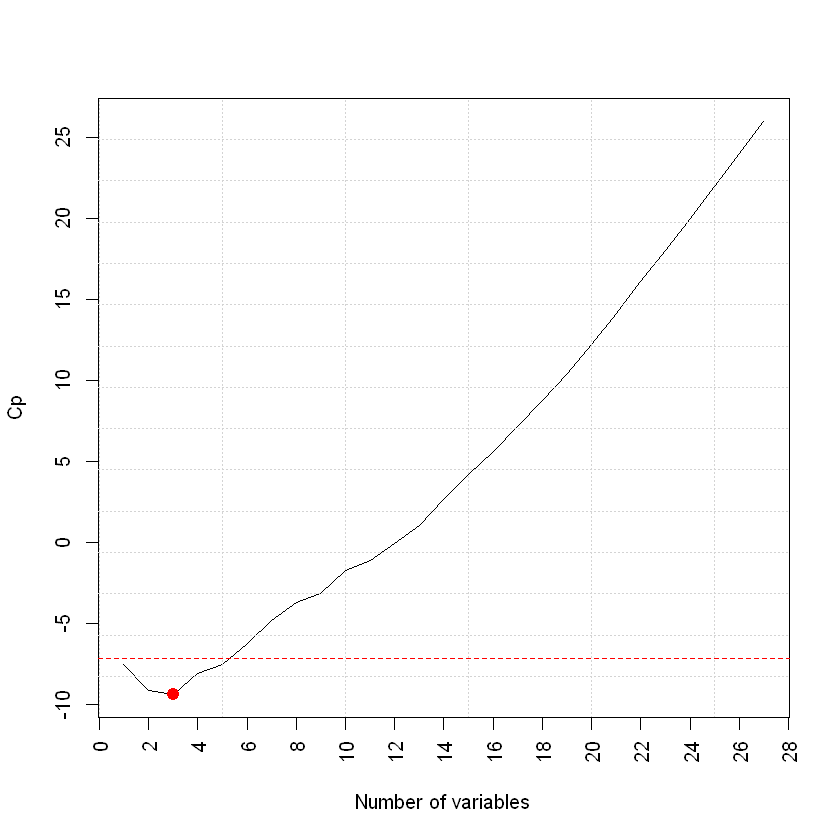

[1] "minimum number of variables are  1"


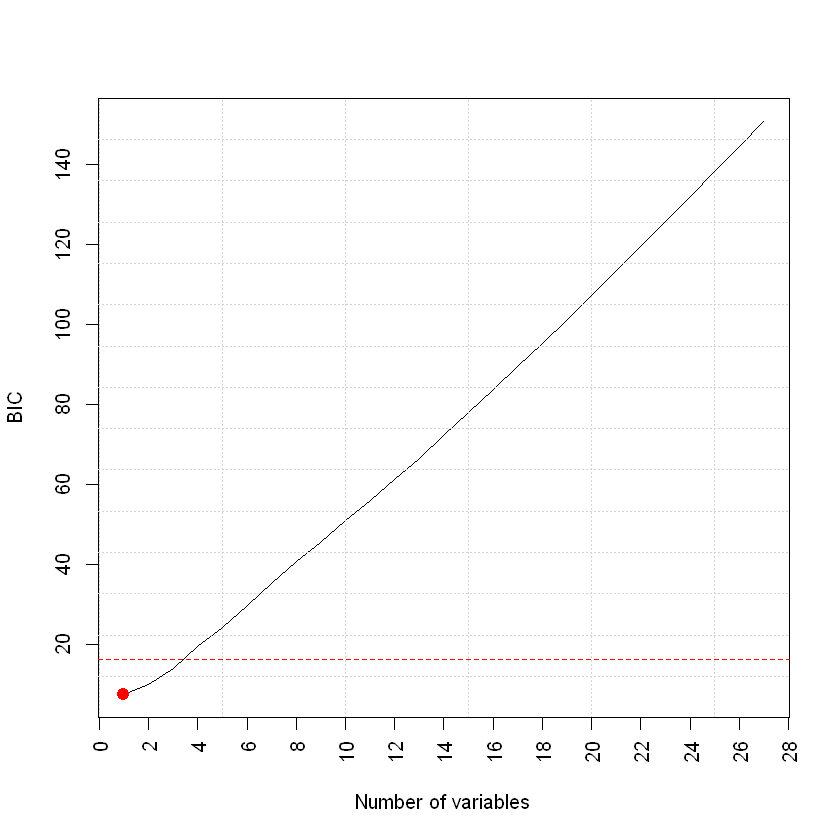

[1] "minimum number of variables are  5"


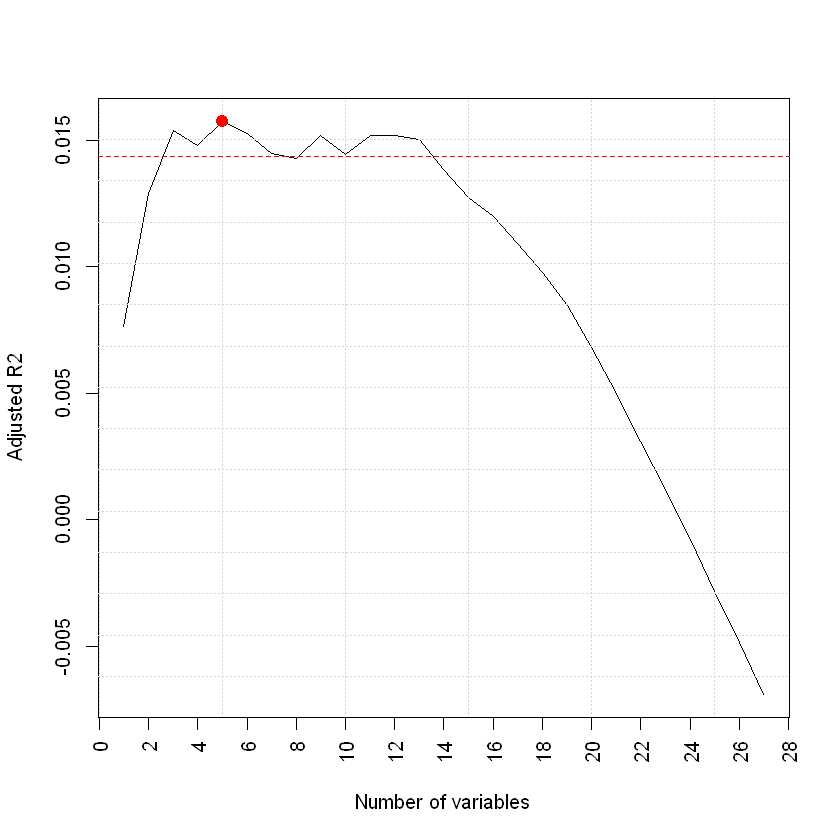

In [35]:
#cp
plot(regfit.backward.sum$cp, xlab = "Number of variables", ylab = "Cp", type = "l",xaxt='n')
grid(, 15)
axis(1, at = seq(0, 31, by = 2), las=2)
min.cp <- min(regfit.backward.sum$cp)
std.cp <- sd(regfit.backward.sum$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
min.cp <- which.min(regfit.backward.sum$cp)
print(paste("minimum number of variables are ",min.cp))
points(min.cp, regfit.backward.sum$cp[min.cp], col = "red", cex = 2, pch = 20)
#BIC
plot(regfit.backward.sum$bic, xlab = "Number of variables", ylab = "BIC", type='l',xaxt='n')
grid(, 15)
axis(1, at = seq(0, 31, by = 2), las=2)
min.bic <- min(regfit.backward.sum$bic)
std.bic <- sd(regfit.backward.sum$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
min.bic <- which.min(regfit.backward.sum$bic)
print(paste("minimum number of variables are ",min.bic))
points(min.bic, regfit.backward.sum$bic[which.min(regfit.backward.sum$bic)], col = "red", cex = 2, pch = 20)
#R2
plot(regfit.backward.sum$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type = "l",xaxt='n')
grid(, 15)
axis(1, at = seq(0, 31, by = 2), las=2)
max.adjr2 <- max(regfit.backward.sum$adjr2)
std.adjr2 <- sd(regfit.backward.sum$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
max.adjr2 <- which.max(regfit.backward.sum$adjr2)
print(paste("minimum number of variables are ",max.adjr2))
points(max.adjr2, regfit.backward.sum$adjr2[max.adjr2], col = "red", cex = 2, pch = 20)

This model also has very low  $C_{p}$ and BIC which are good but it also has a low $R_{2}$. Thus, we're going to choose the top 5 features for our backward model.

In [36]:
#Extracting coefficients
coeff = coef(regfit.backward, id = 5)
bw_variable = names(coeff)
bw_variable

[1] "(Intercept)" "X"           "DMC"         "temp"        "month.aug"  
[6] "day.sun"

In [37]:
bw_df_train <- training[c('X','DMC','temp' ,'month.aug','day.sun','area')]

bw_df_test <- test[c('X','DMC','temp' ,'month.aug' ,'day.sun','area')]

## Prediction Model

### Linear Regresion

One of the major task for us is to predict the burned area. Hence, we need to
build a prediction model using the features/variables given to us. For this task, we will be using Linear
Regression .

 It is one of the most popular regression methods. Linear regressoin can show us the relationship between the dependeant variable with the other independent variables. We will first build a model with all the variables and then subsequently build models with featuers extracted from lasso, forward and backward methods.

In [38]:
fit_lm=lm(area~., training)
summary(fit_lm)


Call:
lm(formula = area ~ ., data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05605 -0.01753 -0.00644  0.00474  0.94789 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0521018  0.0786581   0.662   0.5081  
X            0.0023766  0.0015174   1.566   0.1180  
Y           -0.0004055  0.0028784  -0.141   0.8880  
FFMC         0.0071160  0.0674613   0.105   0.9160  
DMC          0.0579665  0.0253174   2.290   0.0225 *
DC          -0.1087313  0.0497079  -2.187   0.0292 *
ISI         -0.0373721  0.0479154  -0.780   0.4358  
temp         0.0362057  0.0322009   1.124   0.2615  
RH          -0.0139597  0.0250659  -0.557   0.5779  
wind         0.0177975  0.0160712   1.107   0.2687  
rain        -0.0179165  0.0614218  -0.292   0.7707  
month.apr   -0.0737147  0.0420652  -1.752   0.0804 .
month.aug   -0.0259021  0.0104058  -2.489   0.0132 *
month.dec   -0.0277355  0.0330917  -0.838   0.4024 

Warning message:
"not plotting observations with leverage one:
  340"Warning message:
"not plotting observations with leverage one:
  340"

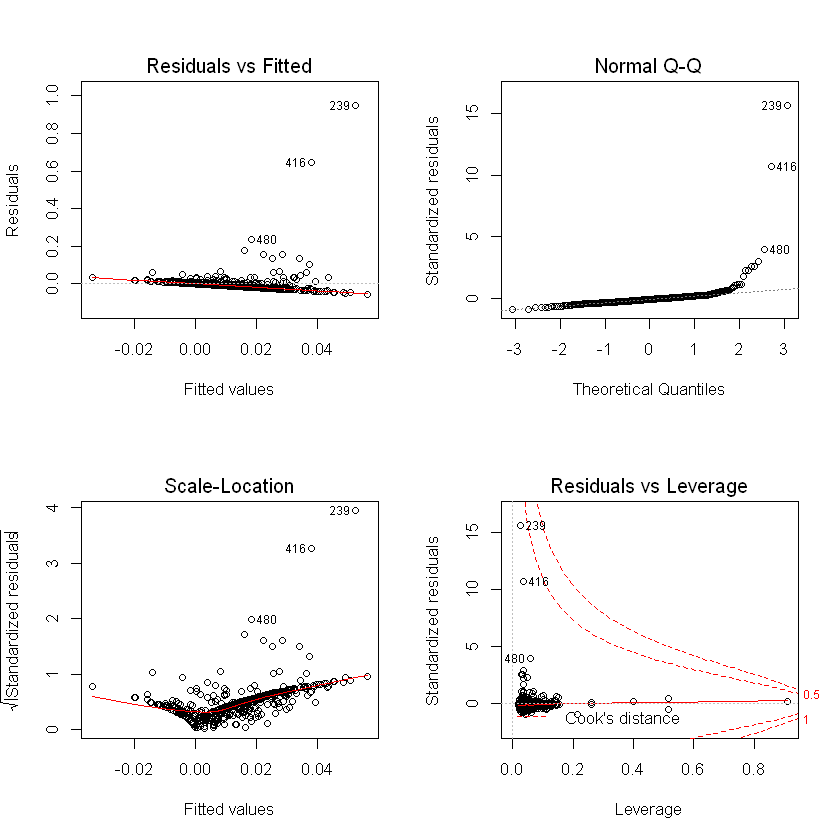

In [39]:
par(mfrow = c(2,2))
plot(fit_lm)

### Linear regression with Lasso shrinkage

In [40]:
fit_lasso=lm(area~.,data=lasso_df_train)
summary(fit_lasso)


Call:
lm(formula = area ~ ., data = lasso_df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05605 -0.01753 -0.00644  0.00474  0.94789 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0068883  0.0809698  -0.085   0.9322  
X            0.0023766  0.0015174   1.566   0.1180  
Y           -0.0004055  0.0028784  -0.141   0.8880  
FFMC         0.0071160  0.0674613   0.105   0.9160  
DMC          0.0579665  0.0253174   2.290   0.0225 *
DC          -0.1087313  0.0497079  -2.187   0.0292 *
ISI         -0.0373721  0.0479154  -0.780   0.4358  
temp         0.0362057  0.0322009   1.124   0.2615  
RH          -0.0139597  0.0250659  -0.557   0.5779  
wind         0.0177975  0.0160712   1.107   0.2687  
rain        -0.0179165  0.0614218  -0.292   0.7707  
month.apr   -0.0114719  0.0491094  -0.234   0.8154  
month.aug    0.0363407  0.0522066   0.696   0.4867  
month.dec    0.0345073  0.0541627   0.637   0

Warning message:
"not plotting observations with leverage one:
  340"Warning message:
"not plotting observations with leverage one:
  340"

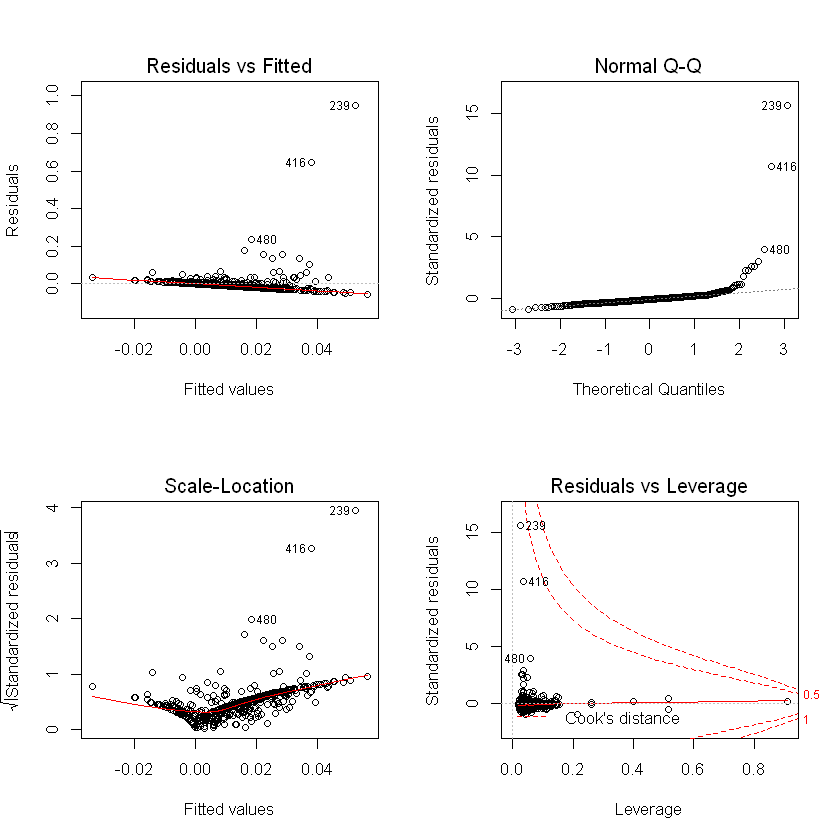

In [41]:
par(mfrow = c(2,2))
plot(fit_lasso)

Linear Regression with forward Stepwise Selection

In [42]:
fit_fd=lm(area~.,data=fwd_df_train)
summary(fit_fd)


Call:
lm(formula = area ~ ., data = fwd_df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03375 -0.01530 -0.00903 -0.00060  0.97547 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.016732   0.013155  -1.272   0.2040  
X            0.001756   0.001214   1.447   0.1485  
temp         0.034910   0.015319   2.279   0.0231 *
wind         0.012550   0.014521   0.864   0.3879  
day.fri     -0.009260   0.007875  -1.176   0.2402  
day.sun     -0.004875   0.007614  -0.640   0.5223  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06102 on 461 degrees of freedom
Multiple R-squared:  0.01901,	Adjusted R-squared:  0.008369 
F-statistic: 1.787 on 5 and 461 DF,  p-value: 0.1141


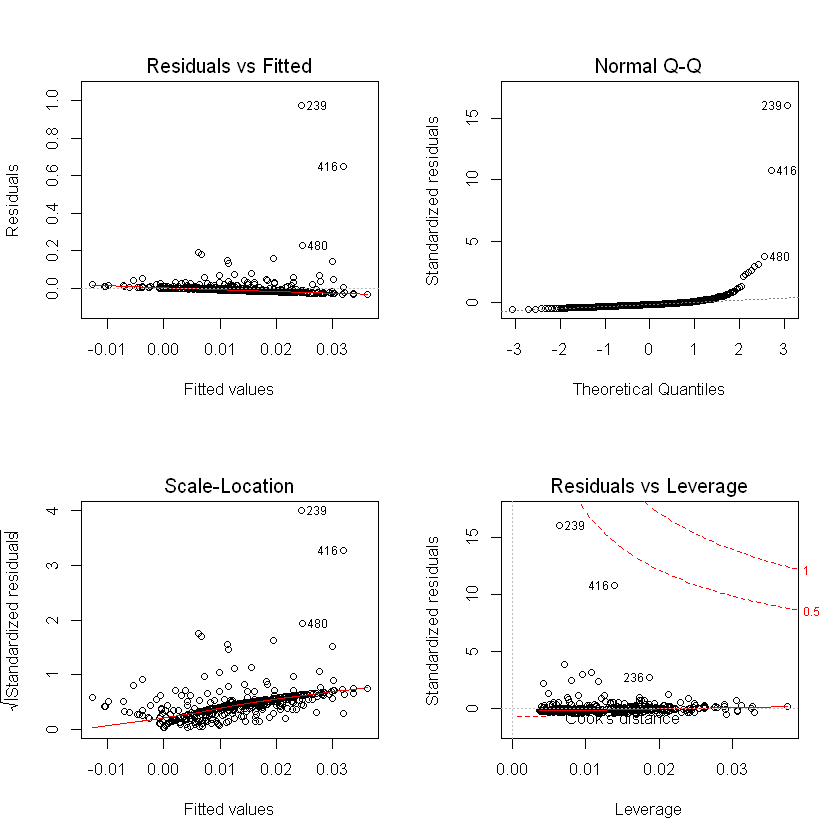

In [43]:
par(mfrow = c(2,2))
plot(fit_fd)

Linear regression using Backward Stepwise Selection

In [44]:
fit_bw=lm(area~.,data=bw_df_train)
summary(fit_bw)


Call:
lm(formula = area ~ ., data = bw_df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03465 -0.01545 -0.00881 -0.00119  0.97449 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.015908   0.010793  -1.474    0.141  
X            0.001870   0.001212   1.543    0.124  
DMC          0.019574   0.015866   1.234    0.218  
temp         0.030024   0.017055   1.760    0.079 .
month.aug   -0.008504   0.006885  -1.235    0.217  
day.sun     -0.002463   0.007436  -0.331    0.741  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.061 on 461 degrees of freedom
Multiple R-squared:  0.01961,	Adjusted R-squared:  0.008976 
F-statistic: 1.844 on 5 and 461 DF,  p-value: 0.1029


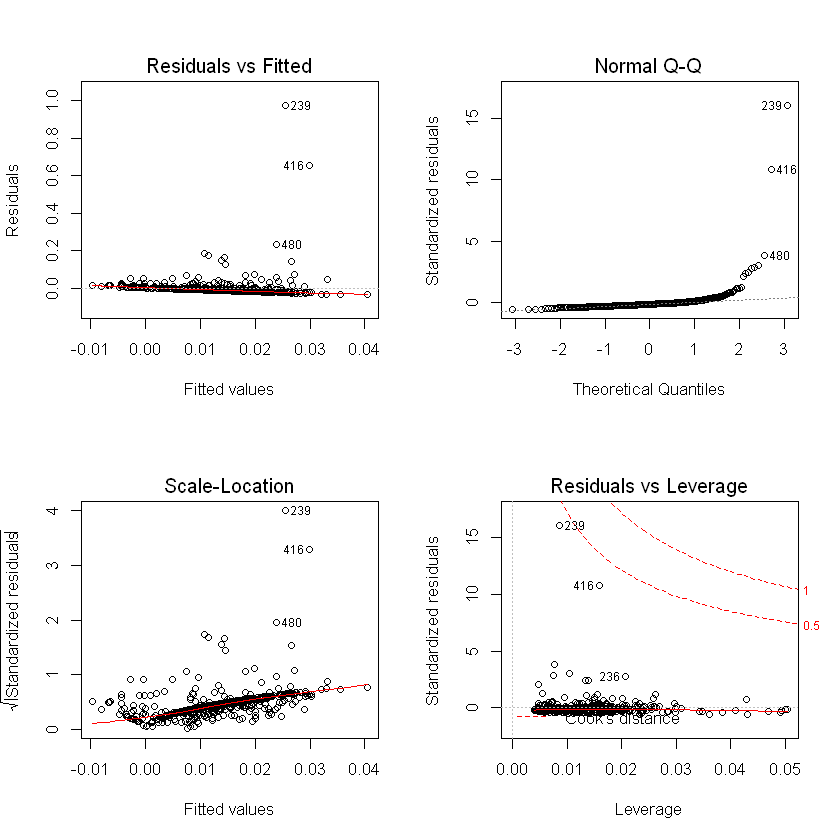

In [45]:
par(mfrow = c(2,2))
plot(fit_bw)

## Model Comparision

After building all our models, let's try to find out which one is the better one.

In [46]:
lm.lm <- train(area~., data=training, method='lm')
cbind(coef= coef(lm.lm$finalModel), confint(lm.lm$finalModel))
lm.lasso <- train(area~., data=lasso_df_train, method='lm')
cbind(coef= coef(lm.lasso$finalModel), confint(lm.lasso$finalModel))
lm.fwd <- train(area~., data=fwd_df_train, method='lm')
cbind(coef= coef(lm.fwd$finalModel), confint(lm.fwd$finalModel))
lm.bw <- train(area~., data=bw_df_train, method='lm')
cbind(coef= coef(lm.bw$finalModel), confint(lm.bw$finalModel))

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

,coef,2.5 %,97.5 %
(Intercept),0.0521018488,-0.1024903830,0.206694081
X,0.0023766477,-0.0006055676,0.005358863
Y,-0.0004055401,-0.0060627521,0.005251672
FFMC,0.0071160217,-0.1254703929,0.139702436
DMC,0.0579664782,0.0082083537,0.107724603
DC,-0.1087313427,-0.2064257974,-0.011036888
ISI,-0.0373721365,-0.1315436671,0.056799394
temp,0.0362057027,-0.0270810392,0.099492445
RH,-0.0139596820,-0.0632234148,0.035304051
wind,0.0177974948,-0.0137884174,0.049383407


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

,coef,2.5 %,97.5 %
(Intercept),-0.0068882805,-0.1660238744,0.152247313
X,0.0023766477,-0.0006055676,0.005358863
Y,-0.0004055401,-0.0060627521,0.005251672
FFMC,0.0071160217,-0.1254703929,0.139702436
DMC,0.0579664782,0.0082083537,0.107724603
DC,-0.1087313427,-0.2064257974,-0.011036888
ISI,-0.0373721365,-0.1315436671,0.056799394
temp,0.0362057027,-0.0270810392,0.099492445
RH,-0.0139596820,-0.0632234148,0.035304051
wind,0.0177974948,-0.0137884174,0.049383407


,coef,2.5 %,97.5 %
(Intercept),-0.016732358,-0.0425843276,0.009119611
X,0.001756345,-0.0006285375,0.004141227
temp,0.034909964,0.0048057045,0.065014224
wind,0.012549708,-0.0159853764,0.041084793
day.fri,-0.009260207,-0.0247350941,0.006214680
day.sun,-0.004875414,-0.0198378584,0.010087031


,coef,2.5 %,97.5 %
(Intercept),-0.015907821,-0.0371177272,0.005302086
X,0.001869822,-0.0005116746,0.004251319
DMC,0.019573895,-0.0116039993,0.050751789
temp,0.030023923,-0.0034920342,0.063539880
month.aug,-0.008504344,-0.0220350685,0.005026380
day.sun,-0.002463189,-0.0170763100,0.012149932


In [47]:
#summary (lm.lm)
summary (lm.lasso)
summary (lm.fwd)
summary (lm.bw)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05605 -0.01753 -0.00644  0.00474  0.94789 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0068883  0.0809698  -0.085   0.9322  
X            0.0023766  0.0015174   1.566   0.1180  
Y           -0.0004055  0.0028784  -0.141   0.8880  
FFMC         0.0071160  0.0674613   0.105   0.9160  
DMC          0.0579665  0.0253174   2.290   0.0225 *
DC          -0.1087313  0.0497079  -2.187   0.0292 *
ISI         -0.0373721  0.0479154  -0.780   0.4358  
temp         0.0362057  0.0322009   1.124   0.2615  
RH          -0.0139597  0.0250659  -0.557   0.5779  
wind         0.0177975  0.0160712   1.107   0.2687  
rain        -0.0179165  0.0614218  -0.292   0.7707  
month.apr   -0.0114719  0.0491094  -0.234   0.8154  
month.aug    0.0363407  0.0522066   0.696   0.4867  
month.dec    0.0345073  0.0541627   0.637   0.5244  


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03375 -0.01530 -0.00903 -0.00060  0.97547 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.016732   0.013155  -1.272   0.2040  
X            0.001756   0.001214   1.447   0.1485  
temp         0.034910   0.015319   2.279   0.0231 *
wind         0.012550   0.014521   0.864   0.3879  
day.fri     -0.009260   0.007875  -1.176   0.2402  
day.sun     -0.004875   0.007614  -0.640   0.5223  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06102 on 461 degrees of freedom
Multiple R-squared:  0.01901,	Adjusted R-squared:  0.008369 
F-statistic: 1.787 on 5 and 461 DF,  p-value: 0.1141



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03465 -0.01545 -0.00881 -0.00119  0.97449 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.015908   0.010793  -1.474    0.141  
X            0.001870   0.001212   1.543    0.124  
DMC          0.019574   0.015866   1.234    0.218  
temp         0.030024   0.017055   1.760    0.079 .
month.aug   -0.008504   0.006885  -1.235    0.217  
day.sun     -0.002463   0.007436  -0.331    0.741  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.061 on 461 degrees of freedom
Multiple R-squared:  0.01961,	Adjusted R-squared:  0.008976 
F-statistic: 1.844 on 5 and 461 DF,  p-value: 0.1029


### Calculating Prediction Accurancy and Error rates

#### Linear Regression with all variables

In [48]:
lm_predict = predict(fit_lm, test)
lm_actuals_preds = data.frame(cbind(actuals=test$area, predicteds=lm_predict))
# make actuals_predicteds dataframe.
lm_correlation_accuracy = cor(lm_actuals_preds)
head(lm_actuals_preds)

Warning message in predict.lm(fit_lm, test):
"prediction from a rank-deficient fit may be misleading"

,actuals,predicteds
3,0,0.017306962
5,0,-0.010551458
21,0,0.027491724
22,0,0.008224251
25,0,0.036274887
33,0,0.009221179


In [49]:
DMwR::regr.eval(lm_actuals_preds$actuals, lm_actuals_preds$predicteds)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


mae          mse         rmse         mape 
0.0159069576 0.0004451168 0.0210977923          Inf

#### Linear regression with Lasso feature selection

In [50]:
lasso_predict = predict(fit_lasso, lasso_df_test)
lasso_actuals_preds = data.frame(cbind(actuals=lasso_df_test$area, predicteds=lasso_predict)) 
# make actuals_predicteds dataframe.
lasso_correlation_accuracy = cor(lasso_actuals_preds)
head(lasso_actuals_preds)

Warning message in predict.lm(fit_lasso, lasso_df_test):
"prediction from a rank-deficient fit may be misleading"

,actuals,predicteds
3,0,0.017306962
5,0,-0.010551458
21,0,0.027491724
22,0,0.008224251
25,0,0.036274887
33,0,0.009221179


In [51]:
DMwR::regr.eval(lasso_actuals_preds$actuals, lasso_actuals_preds$predicteds)

mae          mse         rmse         mape 
0.0146621017 0.0003291873 0.0181435202          Inf

#### Linear regression with Forward Selection

In [52]:
fwd_predict = predict(fit_fd, fwd_df_test)
fwd_actuals_preds = data.frame(cbind(actuals=fwd_df_test$area, predicteds=fwd_predict))
# make actuals_predicteds dataframe.
fwd_correlation_accuracy = cor(fwd_actuals_preds)
head(fwd_actuals_preds)

,actuals,predicteds
3,0,0.010736110
5,0,0.004722224
21,0,0.015085217
22,0,0.014226878
25,0,0.027225776
33,0,0.007151805


In [53]:
DMwR::regr.eval(fwd_actuals_preds$actuals, fwd_actuals_preds$predicteds)

mae          mse         rmse         mape 
0.0113172518 0.0001679666 0.0129601946          Inf

#### Linear Regression with Backward Selection

In [54]:
bw_predict = predict(fit_bw, bw_df_test)
bw_actuals_preds = data.frame(cbind(actuals=bw_df_test$area, predicteds=bw_predict)) 
# make actuals_predicteds dataframe.
bw_correlation_accuracy = cor(bw_actuals_preds)
head(bw_actuals_preds)

,actuals,predicteds
3,0,0.012025243
5,0,0.008855216
21,0,0.019514581
22,0,0.014977145
25,0,0.018760968
33,0,0.017701509


In [55]:
DMwR::regr.eval(bw_actuals_preds$actuals, bw_actuals_preds$predicteds)

mae         mse        rmse        mape 
0.011558555 0.000196398 0.014014206         Inf

By comparing the models we find:

- Forward Selection has the smallest MAE(Mean Absolute error). Small MAE tells us that it is the better model. However, it is important to note there isn't much difference between the models.

- Forward Selection also has the smallest MSE(MEan squared error). Just like MAE, a smller MSE is a good thing. However, just like the previous indicator, there isn'tmuch difference between the models.

- Forward Selection also has the smallest RMSE(Root Mean Squared Error). And again, there isn't much difference amongst them all.

Forward selection seems to be our best model although it has a very slight lead over the others.

### Variable Importance

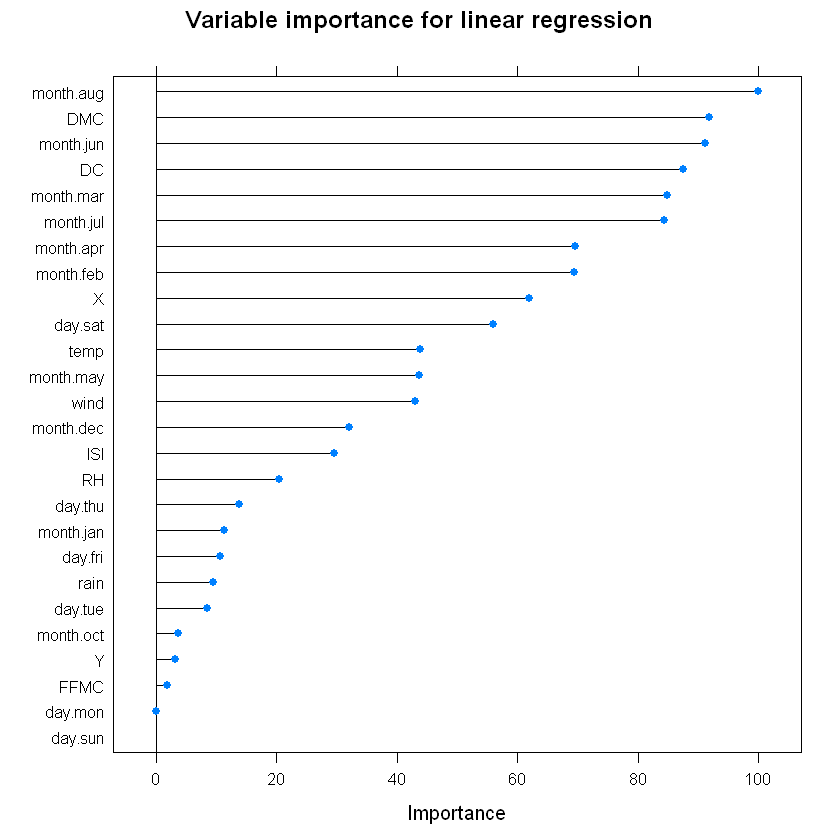

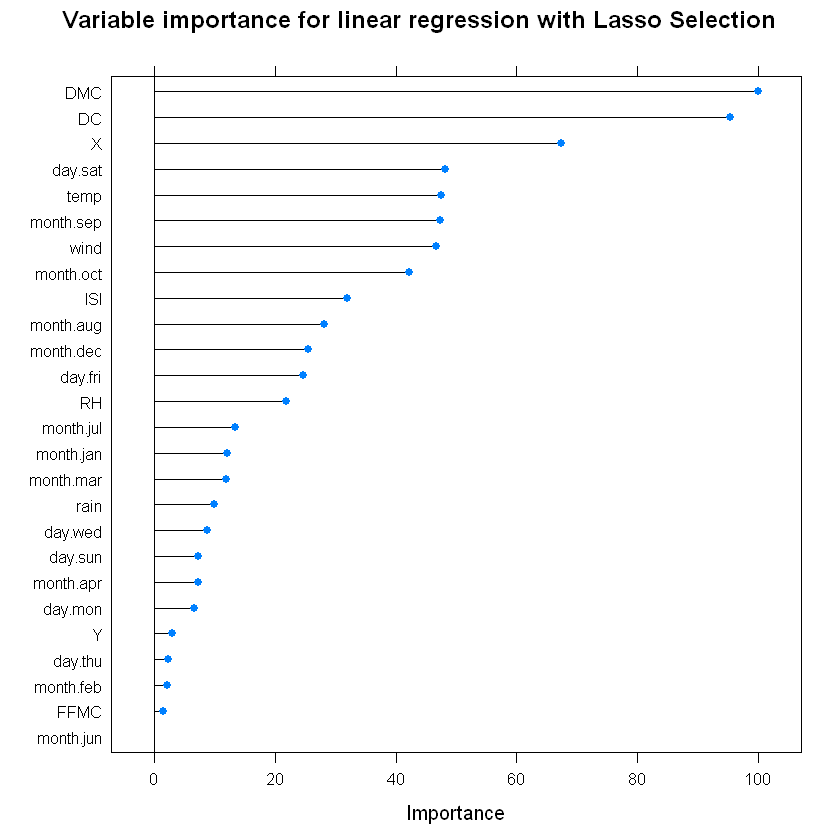

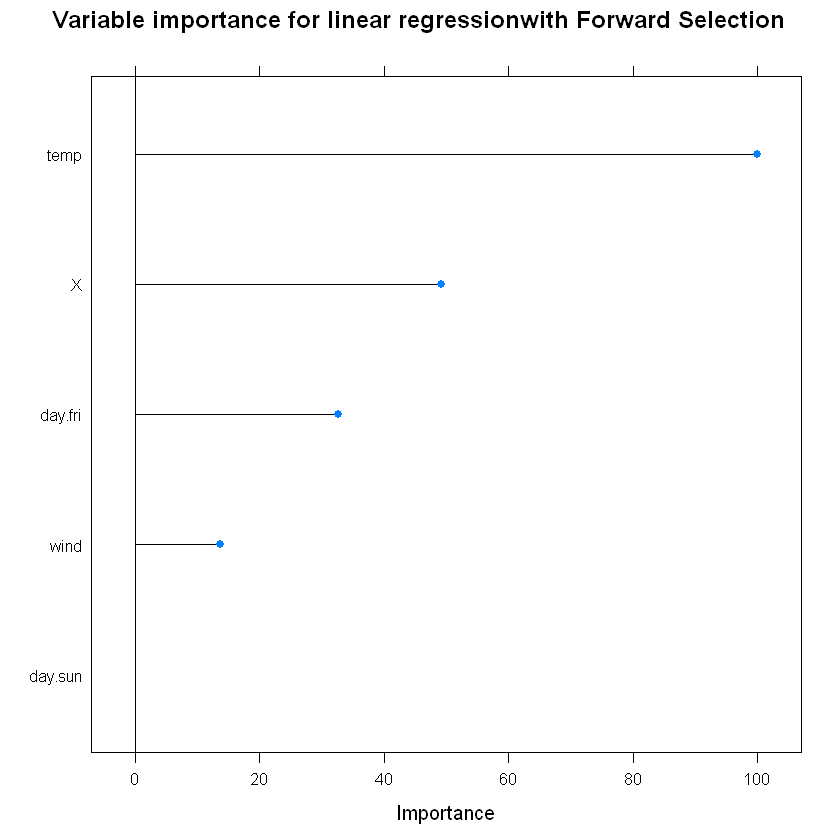

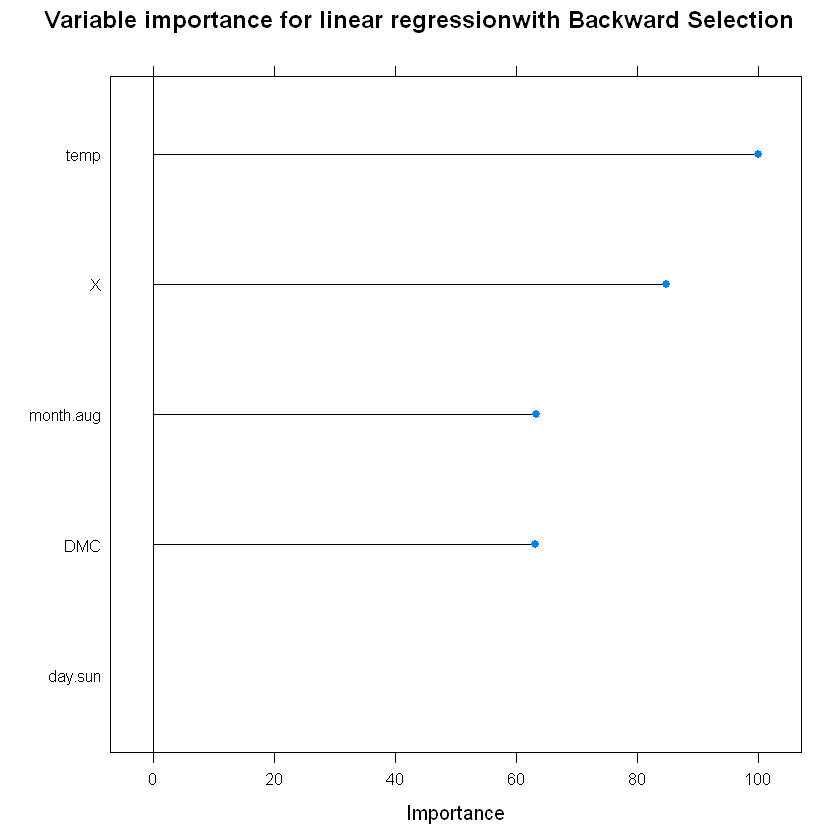

In [56]:
par(mfrow = c(2,2))
plot(varImp(lm.lm, scale = TRUE), main = "Variable importance for linear regression")
plot(varImp(lm.lasso, scale = TRUE), main = "Variable importance for linear regression with Lasso Selection")
plot(varImp(lm.fwd, scale = TRUE), main = "Variable importance for linear regressionwith Forward Selection")
plot(varImp(lm.bw, scale = TRUE), main = "Variable importance for linear regressionwith Backward Selection")

'temp' and 'X' seems to be our most important features to predict the area burned.

## Conclusion

- We performed EDA on our dataset to find out which variables would be best. We noticed a lot of correlation 
amongst a lot of our variables.

- Next we built 4 models to predict our burned area and the Linear regression model with Backwards selection emerged as the best. However, it is important to add that this was a tough prediction problem.

- We can also see that the temperature and X-coordiantes were our most important features. This seems logical as the temperature and geography would certainly decide how impactful the fire is going to be.

## References

- House and Wine dataset from Moodle.
- https://www.youtube.com/watch?v=Qi9notslCzM (Creating a dummy variable using R)

